# **Understanding Data -Feature Engineering**

# Abstract

This notebook focuses on predicting whether it will rain the next day based on historical weather data collected from various Australian weather stations over the past 10 years. The target variable, RainTomorrow, serves as a measure of rainfall risk. Using a combination of meteorological features such as temperature, humidity, wind speed, and cloud cover, we apply machine learning techniques to create a model that accurately predicts future rainfall.

The dataset includes multiple independent variables representing daily weather observations, such as maximum and minimum temperatures, wind conditions, and atmospheric pressure. Principal Component Analysis (PCA) is applied to reduce dimensionality, followed by model training using classification algorithms. The notebook aims to provide insights into the relationships between different weather variables and their impact on rainfall prediction, helping improve weather forecasting accuracy. Key outcomes include identifying the most significant predictors and evaluating model performance through accuracy, precision, and recall metrics.








# Theory and Background

Feature engineering transforms raw data into meaningful inputs that improve model performance by capturing complex relationships between variables. Techniques like interaction features, binning, and PCA help reveal patterns and reduce dimensionality, making models more efficient. In weather forecasting, studies have shown that using meteorological data such as temperature, humidity, and wind speed, along with machine learning models like Random Forest, can enhance prediction accuracy. This project applies these principles to predict rainfall, aiming to improve model interpretability and performance.

# Problem Statement



Accurately predicting rainfall is essential for sectors like agriculture, infrastructure, and disaster management. Using a dataset of 10 years of daily weather observations from Australian stations, this project aims to predict whether it will rain tomorrow (`RainTomorrow`) based on historical meteorological data. The dataset includes variables like temperature, humidity, wind speed, and cloud cover.

The key objectives are:
1. **Data Understanding**: Analyze and preprocess weather data.
2. **Feature Selection**: Identify the most relevant weather variables.
3. **Model Development**: Build and optimize machine learning models for rain prediction.
4. **Evaluation**: Measure model performance using metrics like accuracy and precision.

This project aims to improve rain forecasting by identifying the weather factors that best predict rainfall.

# About Dataset

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

**Taget Variable:**<br>
RainTomorrow - The amount of next day rain in mm. Used to

*   RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"

**Independent Variables:**<br>
* Date - Date of observation<br>
* Location - The common name of the location of the weather station<br>
* MinTemp - The minimum temperature in degrees celsius<br>
* MaxTemp - The maximum temperature in degrees celsius<br>
* Rainfall - The amount of rainfall recorded for the day in mm<br>
* Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
* Sunshine - The number of hours of bright sunshine in the day.<br>
* WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight<br>
* WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
* WindDir9am - Direction of the wind at 9am<br>
* WindDir3pm - Direction of the wind at 3pm<br>
* WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
* WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
* Humidity9am - Humidity (percent) at 9am<br>
* Humidity3pm - Humidity (percent) at 3pm<br>
* Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
* Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
* Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many <br>
* Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values<br>
* Temp9am - Temperature (degrees C) at 9am<br>
* Temp3pm - Temperature (degrees C) at 3pm<br>
* RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/discussion)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import random, math
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
import statsmodels.api as sm

Load the dataset

In [ ]:
# Read csv
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
#print total number of columns and rows present in the dataset
print('The Dataset has', df.shape[0], 'rows and', df.shape[1],'columns')

The Dataset has 145460 rows and 23 columns


In [ ]:
#print datatype of each column to find categorical and numerical variable
print('Column Name      Datatype')
print("")
print(df.dtypes)

Column Name      Datatype

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


This weather dataset comprises 7 categorical columns with data stored as 'Object' datatype and 16 numerical columns represented as 'float64' datatype.

In [ ]:
#Look for concise summary of dataset using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## EDA on categorical variables

**Exploratory Data Analysis (EDA)** is the process of analyzing and visualizing datasets to understand their main characteristics, spot patterns, and detect anomalies before applying any formal modeling or hypothesis testing. EDA uses both statistical methods and graphical techniques such as histograms, box plots, scatter plots, and correlation matrices to summarize the data and uncover relationships between variables. By exploring data through EDA, analysts can detect trends, outliers, missing values, and hidden patterns that can guide further analysis, feature selection, and model-building decisions. It helps to form hypotheses, validate assumptions, and prepare data for more sophisticated machine learning or statistical models.

In [ ]:
# we will look at categorical columns which has datatype as 'Object'
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# This will give statistical summary statistics of the categorical columns
df[cat_cols].describe()

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [ ]:
#Look for concise summary of dataset using info()
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   135134 non-null  object
 3   WindDir9am    134894 non-null  object
 4   WindDir3pm    141232 non-null  object
 5   RainToday     142199 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


Now, we will impute categorical variable with mode.
Imputing categorical variables with the mode involves replacing missing values in a dataset with the most frequently occurring category (mode) for that variable. This method is particularly useful for categorical data, as it preserves the distribution of the existing categories and minimizes distortion. By using the mode, we maintain the integrity of the dataset while ensuring that all entries have valid values, which is essential for many machine learning algorithms that cannot handle missing data.

In [ ]:
# Impute categorical var with Mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [ ]:
# Check Categorical columns again for the null values
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   145460 non-null  object
 3   WindDir9am    145460 non-null  object
 4   WindDir3pm    145460 non-null  object
 5   RainToday     145460 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


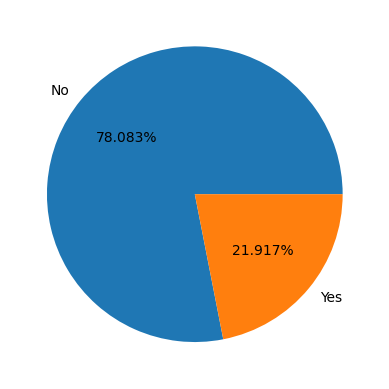

In [ ]:
# plot distribution of 'RainToday' variable
d = df['RainToday'].value_counts()
labels = list(d.index)
d
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

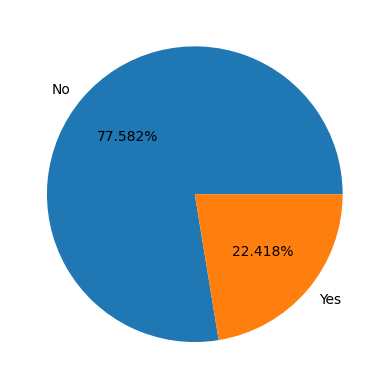

In [ ]:
# plot distribution of 'RainTomorrow' target variable
df.dropna(subset=['RainTomorrow'], inplace=True)
d = df['RainTomorrow'].value_counts()
labels = list(d.index)
d
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

# Data preprocessing & Feature Engineering




## Encoding Categorical Variables Using label Encoding
Label Encoding is a type of categorical encoding that assigns a unique integer to each distinct category in a feature. It converts categorical text data into numeric labels based on the order in which they appear.
We will convert Date object to year, month and date which then can be converted to categorical columns

In [ ]:
# Convert Date object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Split Date to 'Year', 'Month' & 'Day'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [ ]:
# Drop 'Date' from df
data = df.drop('Date', axis=1, inplace=True)

data = df.dropna(axis=0, how='any', subset=["RainTomorrow"])

df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

In [ ]:
# Check unique location
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# cat_features is a list of column names representing categorical features in a dataset
cat_features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']

print(data.shape)

(142193, 25)


In [ ]:
# check top 5
df[cat_features].head()

Year  Month  Day Location WindGustDir WindDir9am WindDir3pm RainToday
0  2008     12    1   Albury           W          W        WNW        No
1  2008     12    2   Albury         WNW        NNW        WSW        No
2  2008     12    3   Albury         WSW          W        WSW        No
3  2008     12    4   Albury          NE         SE          E        No
4  2008     12    5   Albury           W        ENE         NW        No

In [ ]:
lencoders = {}
features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']
for col in data[features].columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [ ]:
encoded_data = data.copy()
encoded_data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6          NaN       NaN           13   
1         2      7.4     25.1       0.0          NaN       NaN           14   
2         2     12.9     25.7       0.0          NaN       NaN           15   
3         2      9.2     28.0       0.0          NaN       NaN            4   
4         2     17.5     32.3       1.0          NaN       NaN           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1       8.0   
1           44.0           6          15  ...       1007.8       NaN   
2           46.0          13          15  ...       1008.7       NaN   
3           24.0           9           0  ...       1012.8       NaN   
4           41.0           1           7  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0       NaN     16.9     21.8          0             0     1     11    0  
1       NaN     17.2     24.3          0             0     1     11    1  
2       2.0     21.0     23.2          0             0     1     11    2  
3       NaN     18.1     26.5          0             0     1     11    3  
4       8.0     17.8     29.7          0             0     1     11    4  

[5 rows x 25 columns]

## EDA on continuos variables

In [ ]:
# we will look at categorical columns which does not have datatype as 'Object'
num_cols = df.select_dtypes(exclude=['object']).columns
df[num_cols].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  Day  
0       1007.1       8.0       NaN     16.9     21.8  2008     12    1  
1       1007.8       NaN       NaN     17.2     24.3  2008     12    2  
2       1008.7       NaN       2.0     21.0     23.2  2008     12    3  
3       1012.8       NaN       NaN     18.1     26.5  2008     12    4  
4       1006.0       7.0       8.0     17.8     29.7  2008     12    5

In [ ]:
# This will give statistical summary statistics of the numerical columns
df[num_cols].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  \
count  88536.000000  85099.000000  141289.000000  139467.000000   
mean       4.437189      4.503167      16.987509      21.687235   
std        2.887016      2.720633       6.492838       6.937594   
min        0.000000      0.000000      -7.200000      -5.400000   
25%        1.000000      2.000000      12.300000      16.600000   
50%        5.000000      5.000000      16.700000      21.100000   
75%        7.000000      7.000000      21.600000      26.400000   
max        9.000000      9.000000      40.200000      46.700000   

                Year          Month            Day  
count  142193.000000  142193.000000  142193.000000  
mean     2012.758926       6.402544      15.715084  
std         2.541256       3.426506       8.798150  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

In [ ]:
#Look for concise summary of dataset using info()
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    81350 non-null   float64
 4   Sunshine       74377 non-null   float64
 5   WindGustSpeed  132923 non-null  float64
 6   WindSpeed9am   140845 non-null  float64
 7   WindSpeed3pm   139563 non-null  float64
 8   Humidity9am    140419 non-null  float64
 9   Humidity3pm    138583 non-null  float64
 10  Pressure9am    128179 non-null  float64
 11  Pressure3pm    128212 non-null  float64
 12  Cloud9am       88536 non-null   float64
 13  Cloud3pm       85099 non-null   float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  Year           142193 non-null  int32  
 17  Month          142193 non-null  in

In [ ]:
# Pandas profiling before data preprocessing
!pip install typing_extensions
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df[num_cols], title='Pandas profiling before data preprocessing', minimal=True)
profile.to_notebook_iframe()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=78e63464ba3bbbc12825fa434fba4d44efa7c80c677f830b174cc534311ed69c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# num_features is a list of column names representing numerical features in a dataset
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

df[num_features]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
145454      3.5     21.8       0.0          NaN       NaN           31.0   
145455      2.8     23.4       0.0          NaN       NaN           31.0   
145456      3.6     25.3       0.0          NaN       NaN           22.0   
145457      5.4     26.9       0.0          NaN       NaN           37.0   
145458      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1       8.0       NaN     16.9     21.8  
1            1007.8       NaN       NaN     17.2     24.3  
2            1008.7       NaN       2.0     21.0     23.2  
3            1012.8       NaN       NaN     18.1     26.5  
4            1006.0       7.0       8.0     17.8     29.7  
...             ...       ...       ...      ...      ...  
145454       1021.2       NaN       NaN      9.4     20.9  
145455       1020.3       NaN       NaN     10.1     22.4  
145456       1019.1       NaN       NaN     10.9     24.5  
145457       1016.8       NaN       NaN     12.5     26.1  
145458       1016.5       3.0       2.0     15.1     26.0  

[142193 rows x 16 columns]

In [ ]:
#Lets find missing value columns
missing_values = encoded_data[num_features].isnull().sum()
missing_values

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

Lets find out missing values in percentage

In [ ]:
# Missing values in percent
missing_values_pct = encoded_data[num_features].isnull().sum()/encoded_data.shape[0]*100
missing_values_pct.sort_values(ascending=False)

Sunshine         47.692924
Evaporation      42.789026
Cloud3pm         40.152469
Cloud9am         37.735332
Pressure9am       9.855619
Pressure3pm       9.832411
WindGustSpeed     6.519308
Humidity3pm       2.538803
Temp3pm           1.917113
WindSpeed3pm      1.849599
Humidity9am       1.247600
Rainfall          0.988797
WindSpeed9am      0.948007
Temp9am           0.635756
MinTemp           0.447983
MaxTemp           0.226453
dtype: float64

Now we will impute values to missing data

In [ ]:
# Impute data with MICE imputer
imputed_data = encoded_data.copy(deep=True)
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
# Check for missing values
imputed_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas profiling before data preprocessing', minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-36-55153330f082>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  imputed_data.hist(ax=ax)


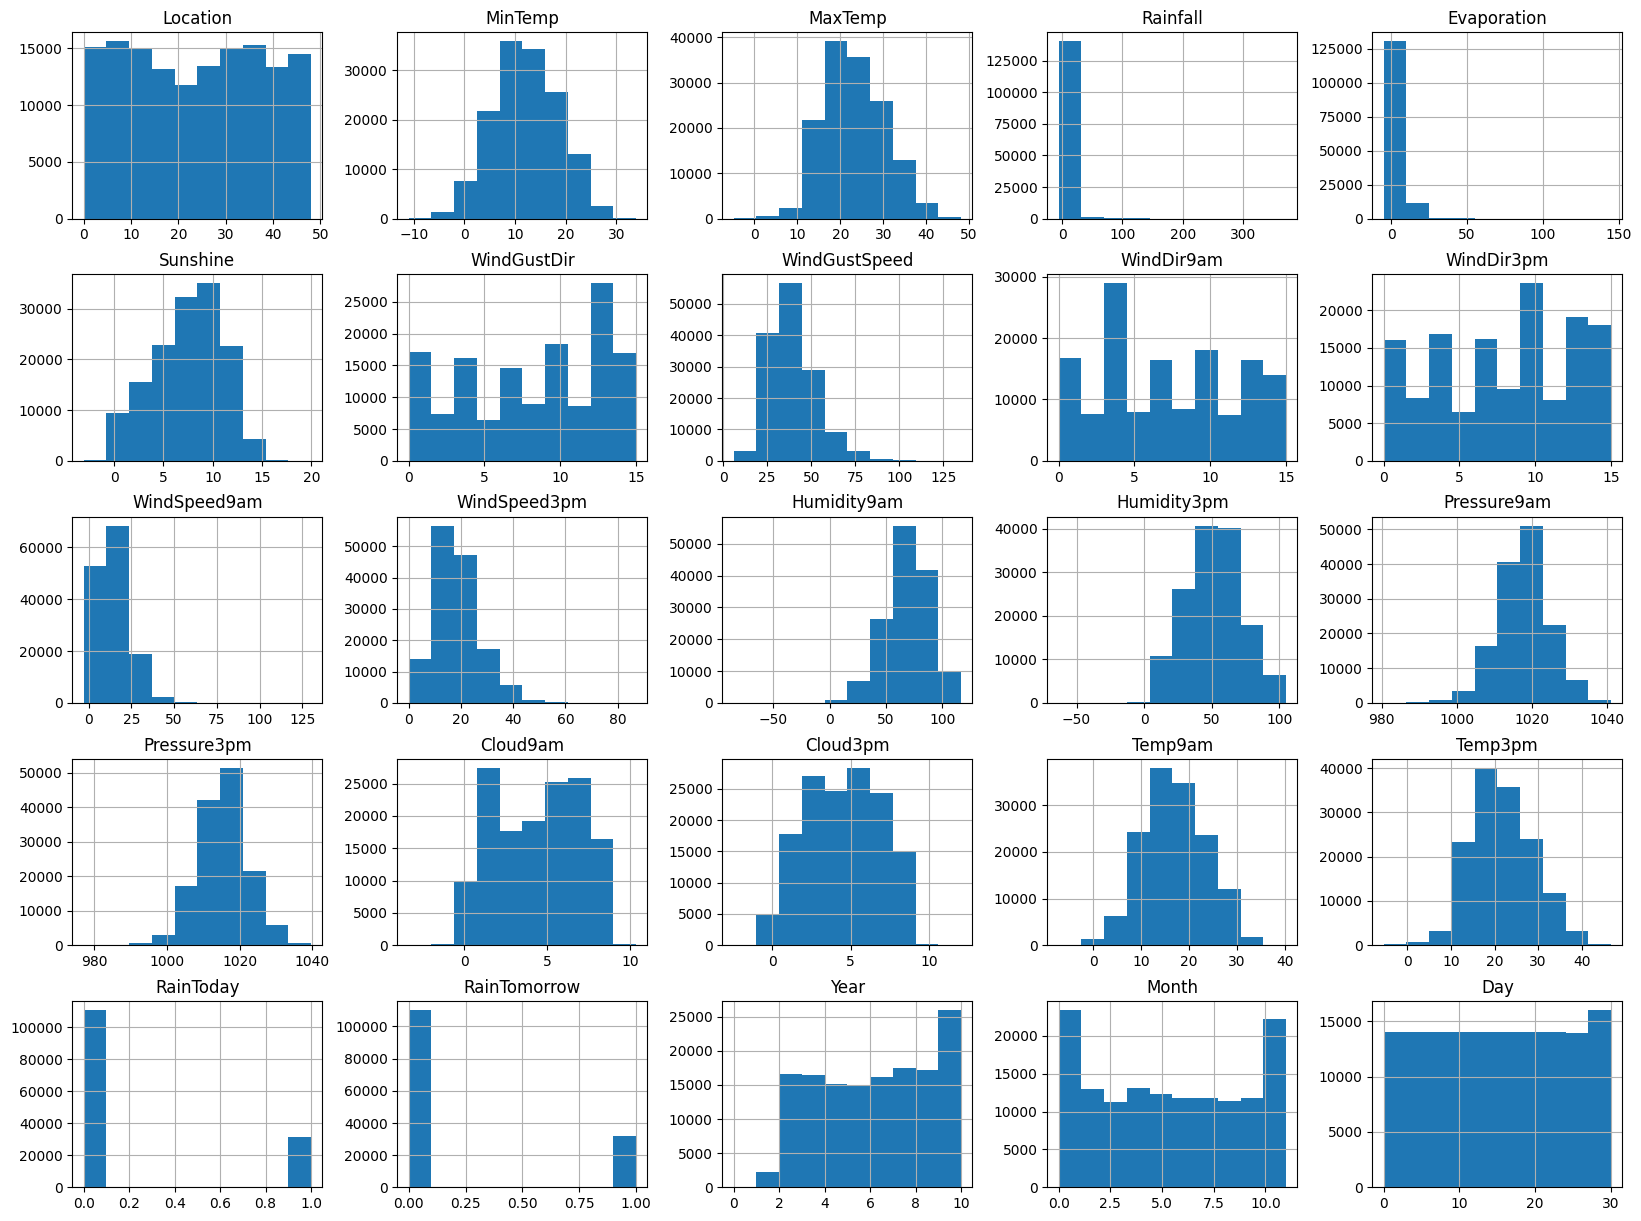

In [ ]:
# Plot Histogram
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
imputed_data.hist(ax=ax)
plt.show()

The histograms provide insights into the distribution of different weather-related variables. Here’s a summary of the key points:

Bimodal Distributions: Variables like Sunshine, Cloud9am, and Cloud3pm show two distinct peaks, indicating two predominant levels of these variables in the data.

Skewed Normal Distributions: Variables such as MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, and Temp3pm are close to a normal distribution but show some skewness, either to the left or right, meaning that most values are clustered around a central point, but there are outliers in one direction.

Exponential Distributions: Variables like Rainfall, Evaporation, WindSpeed9am, and WindSpeed3pm are highly skewed, with a long tail, suggesting that lower values are much more frequent than higher values, typical of data related to weather events like rainfall, where small amounts occur more frequently.

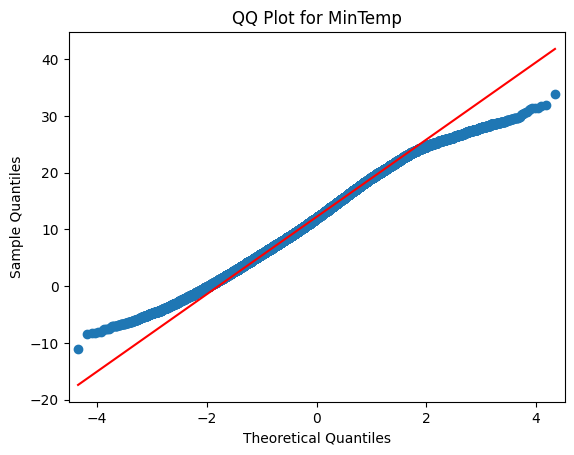

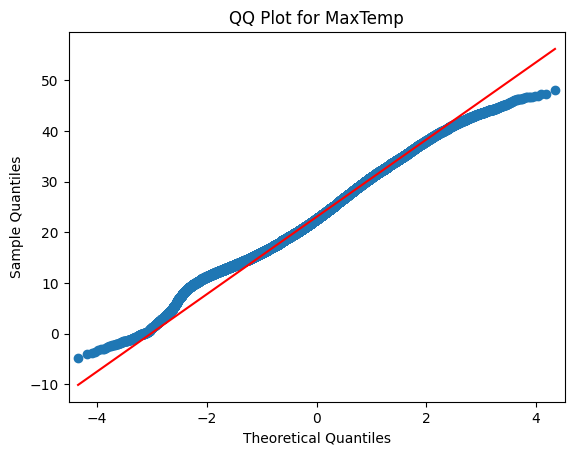

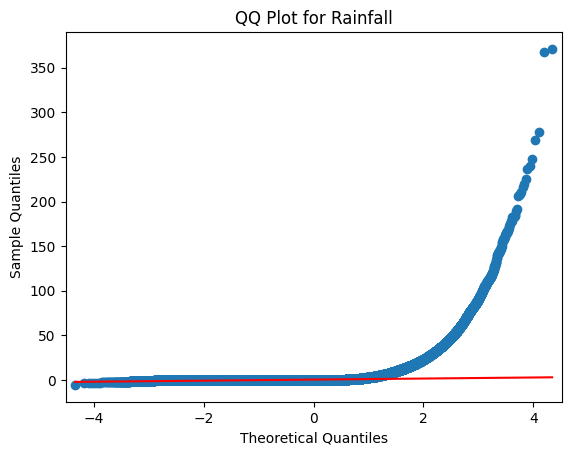

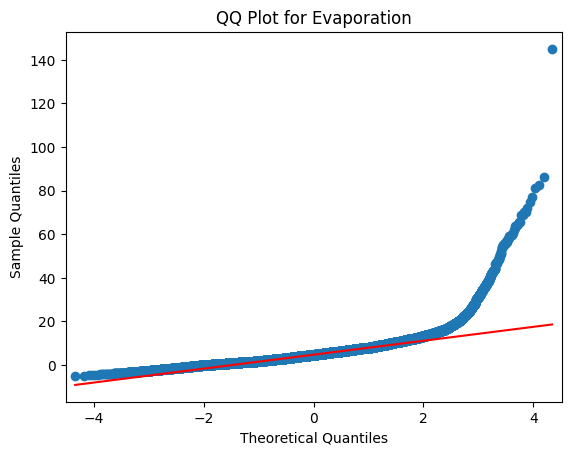

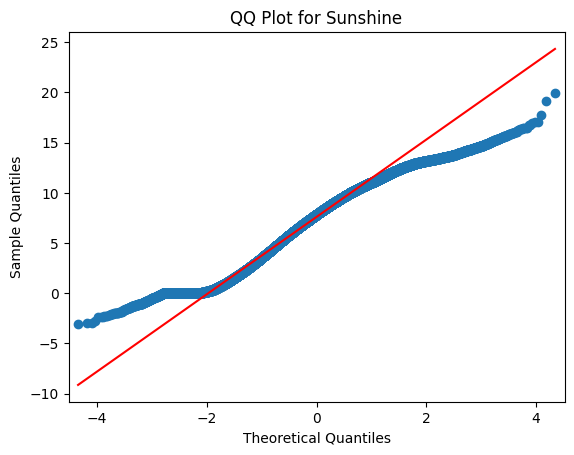

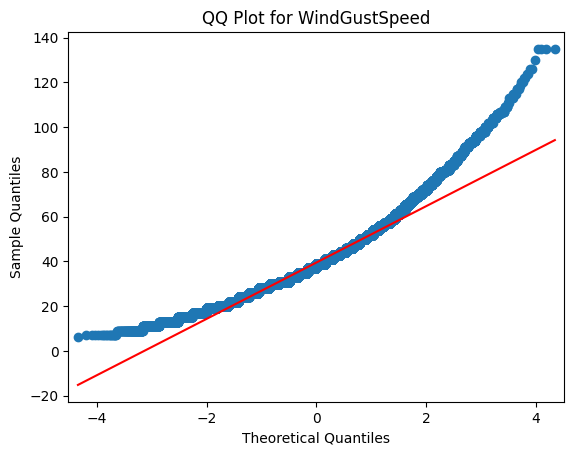

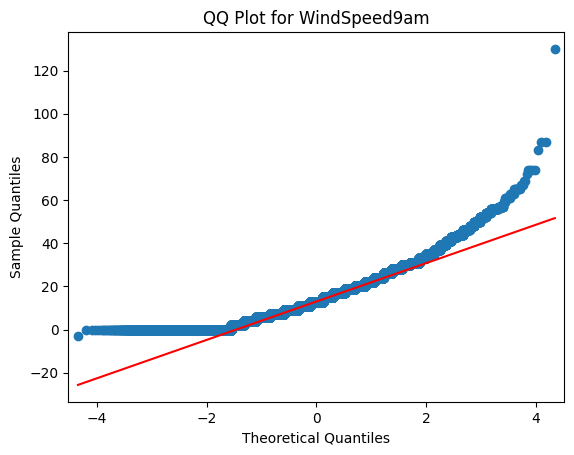

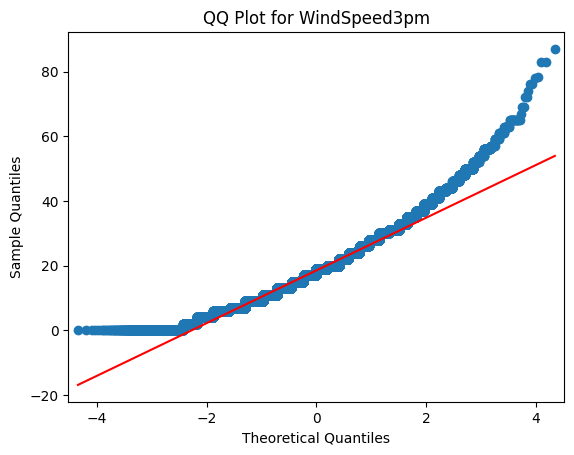

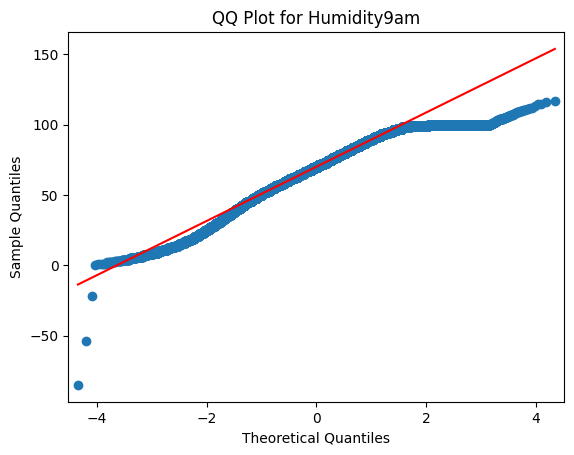

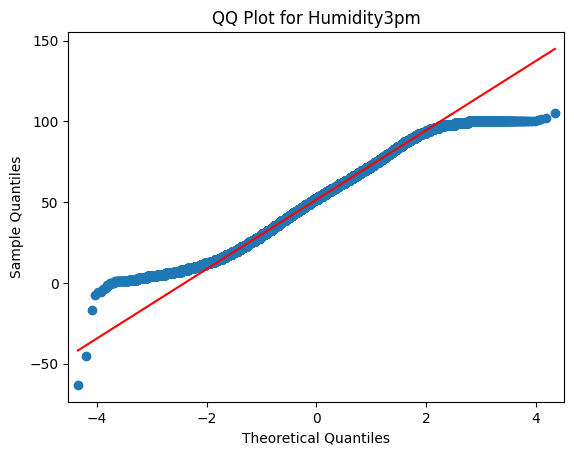

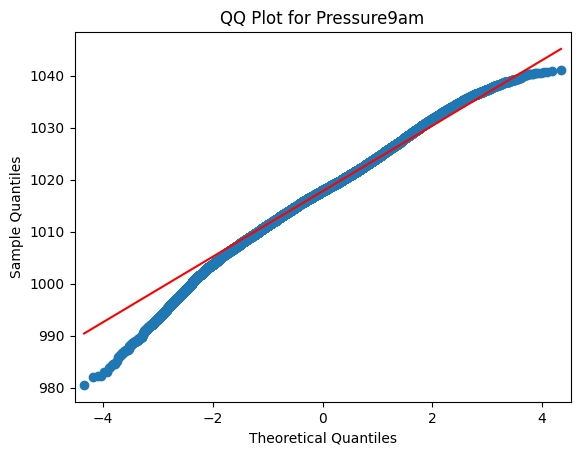

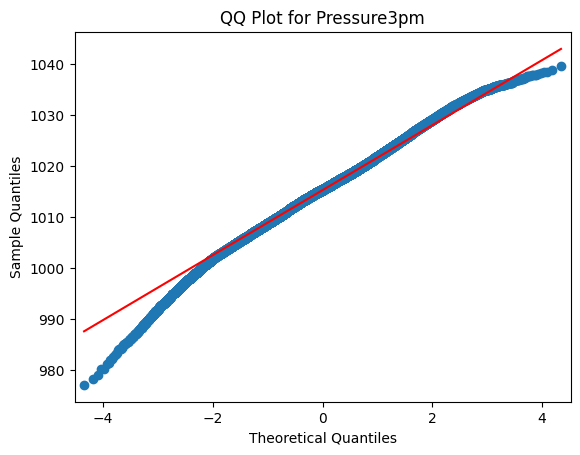

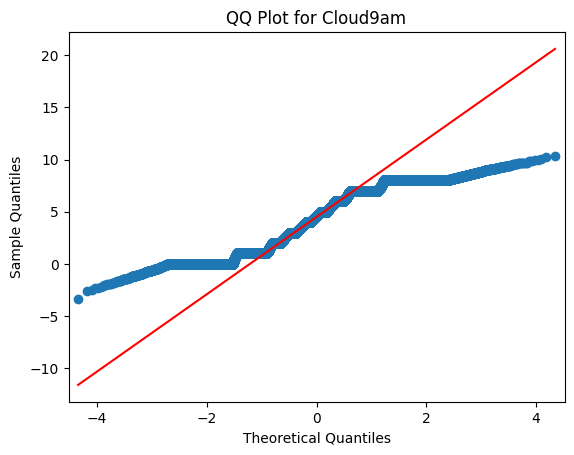

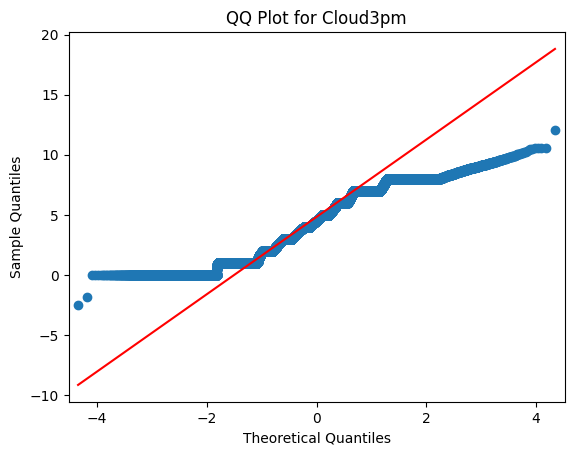

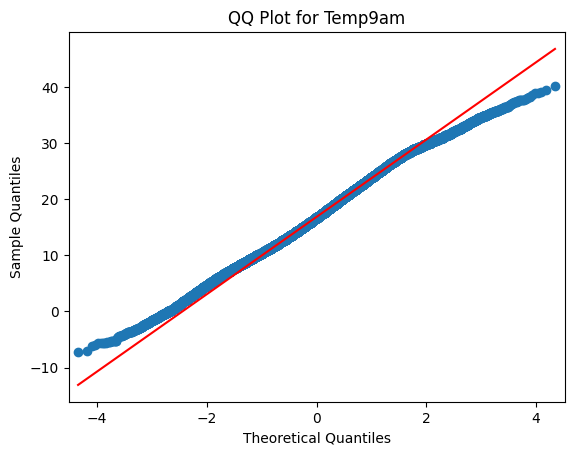

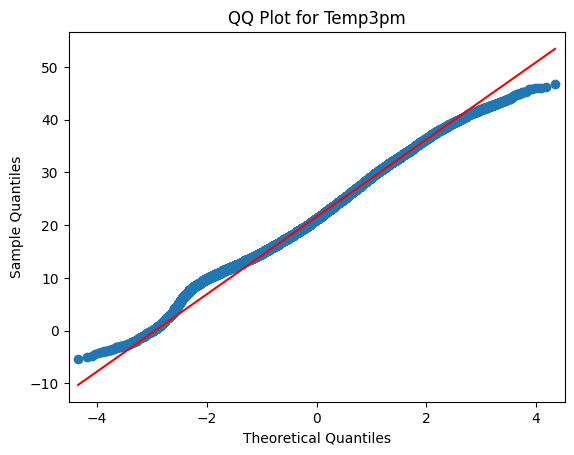

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Loop through each numeric column in the DataFrame
for column in df.select_dtypes(include=['float64']):
#    data = df[column].dropna()  # Remove missing values if any
    sm.qqplot(imputed_data[column], line='q')
    plt.title(f'QQ Plot for {column}')
    plt.show()



*   **Bimodal Distributions:** Sunshine, Cloud9am, Cloud3pm
*   **Skewed Normal Distributions:** MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm
*   **Exponential Distributions:** Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm


## Scaling and Normalization

Normalization is the process of adjusting the values of a dataset to a common scale, ensuring that features contribute equally to the analysis, particularly in distance-based algorithms

In [ ]:
for column in imputed_data[cat_features]:
  # Calculate the frequency of each category
  freq = imputed_data[column].value_counts()
  print(column)
  # Print the frequency of each category
  print(freq)
  print("")


Year
Year
9     17508
7     17400
8     17231
2     16595
3     16419
6     16097
4     15126
5     15044
10     8466
1      2246
0        61
Name: count, dtype: int64

Month
Month
4     13055
2     13036
0     12921
5     12389
9     11804
6     11779
7     11762
10    11461
8     11345
3     11306
11    10810
1     10525
Name: count, dtype: int64

Day
Day
0     4688
14    4688
15    4687
12    4686
1     4686
5     4684
21    4684
2     4683
11    4682
6     4680
20    4677
13    4677
18    4676
19    4675
3     4674
22    4672
8     4672
16    4671
7     4671
10    4668
4     4667
23    4666
24    4665
17    4665
9     4664
25    4637
27    4630
26    4627
28    4374
29    4280
30    2737
Name: count, dtype: int64

Location
Location
9     3418
37    3337
31    3193
13    3192
15    3188
7     3161
0     3090
6     3034
39    3033
3     3031
22    3030
17    3028
5     3028
1     3016
2     3011
32    3009
19    3009
20    3007
38    3005
28    3002
35    3000
44    2999
40    2998
3

In [ ]:
normalized_data = imputed_data.copy()
for column in normalized_data[cat_features]:
    freq = normalized_data[column].value_counts(normalize=True)
    print(f"{column}\n{freq}\n")

Year
Year
9     0.123128
7     0.122369
8     0.121180
2     0.116708
3     0.115470
6     0.113205
4     0.106377
5     0.105800
10    0.059539
1     0.015795
0     0.000429
Name: proportion, dtype: float64

Month
Month
4     0.091812
2     0.091678
0     0.090869
5     0.087128
9     0.083014
6     0.082838
7     0.082719
10    0.080602
8     0.079786
3     0.079512
11    0.076023
1     0.074019
Name: proportion, dtype: float64

Day
Day
0     0.032969
14    0.032969
15    0.032962
12    0.032955
1     0.032955
5     0.032941
21    0.032941
2     0.032934
11    0.032927
6     0.032913
20    0.032892
13    0.032892
18    0.032885
19    0.032878
3     0.032871
22    0.032857
8     0.032857
16    0.032850
7     0.032850
10    0.032829
4     0.032822
23    0.032815
24    0.032808
17    0.032808
9     0.032800
25    0.032611
27    0.032561
26    0.032540
28    0.030761
29    0.030100
30    0.019248
Name: proportion, dtype: float64

Location
Location
9     0.024038
37    0.023468
31    0.02

In [ ]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-null  fl

Year


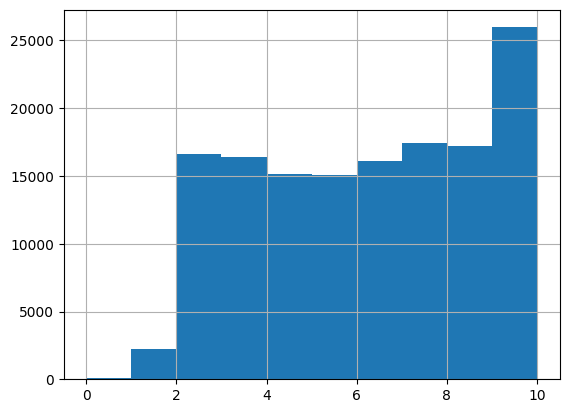

Month


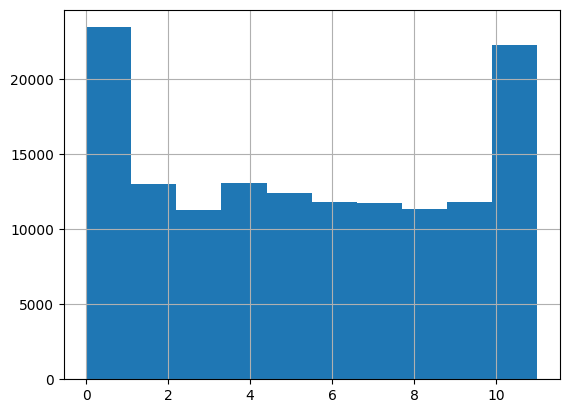

Day


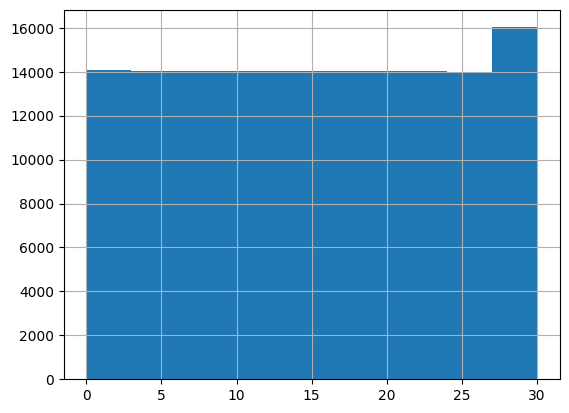

Location


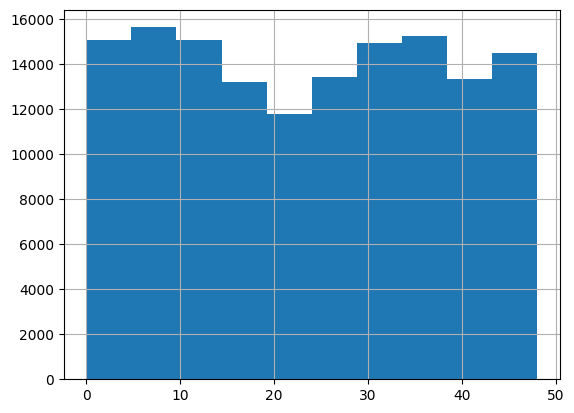

WindGustDir


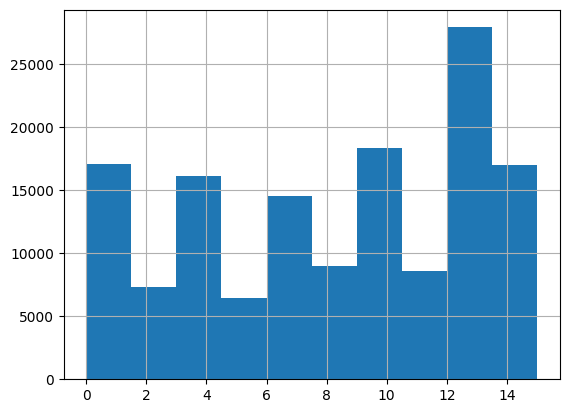

WindDir9am


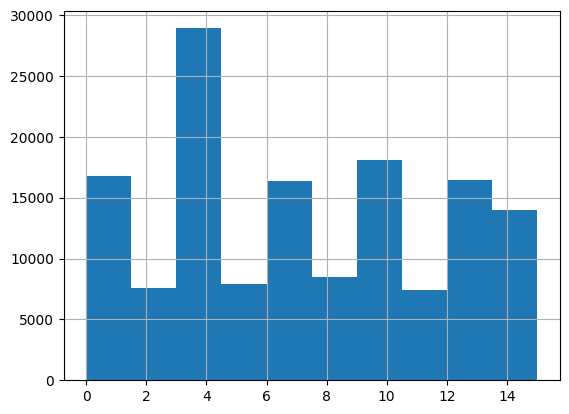

WindDir3pm


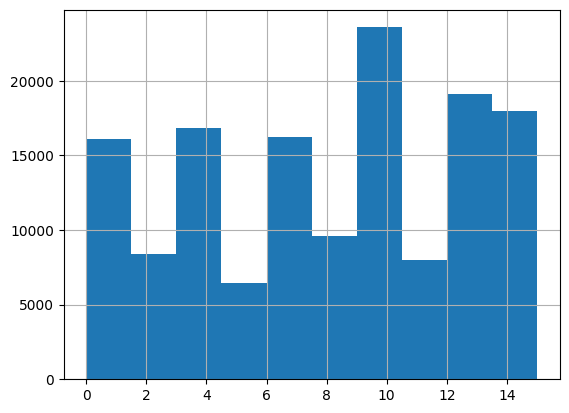

RainToday


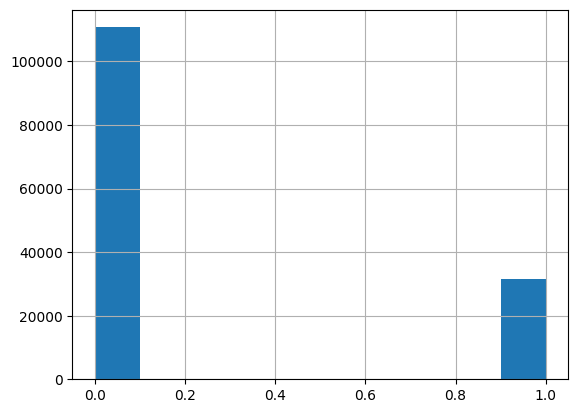

In [ ]:
for i, column in enumerate(normalized_data[cat_features]):
    print(column)
    plt.figure(i)
    normalized_data[column].hist()
    plt.show()

<ipython-input-42-8d86d5fa2d27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data = normalized_data, palette = "Set1")


<Axes: xlabel='RainTomorrow', ylabel='count'>

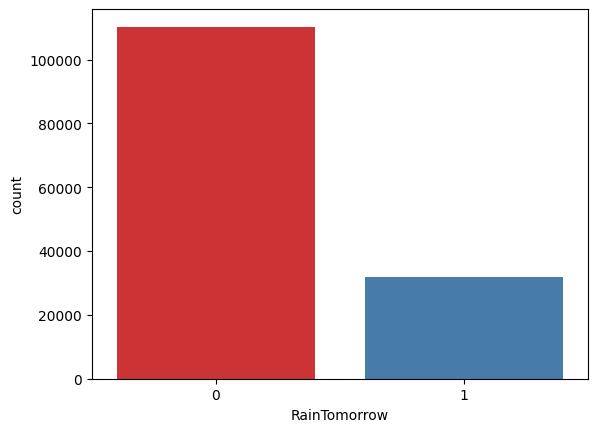

In [ ]:
# check Countplot for "RainTomorrow" target variable
sns.countplot(x='RainTomorrow', data = normalized_data, palette = "Set1")

The count plot shows a significant class imbalance in the RainTomorrow variable, with far more instances of 0 (no rain) than 1 (rain). This imbalance, where over 100,000 days have no rain compared to fewer than 40,000 days with rain, could negatively impact machine learning models. To address this, techniques like resampling or using metrics like precision, recall, or F1-score are necessary, as accuracy alone may not provide a reliable evaluation of model performance for predicting rain.

<ipython-input-43-ee649a0bce4a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data = balanced_df, palette = "Set1")


<Axes: xlabel='RainTomorrow', ylabel='count'>

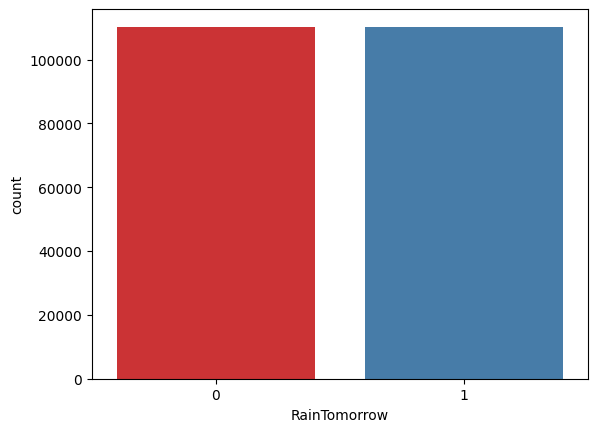

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = normalized_data[normalized_data.RainTomorrow == 0]
minority_class = normalized_data[normalized_data.RainTomorrow == 1]

# Upsample the minority class to match the majority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the majority class and upsampled minority class
balanced_df = pd.concat([majority_class, minority_upsampled])

# Now, balanced_df contains a balanced dataset
sns.countplot(x='RainTomorrow', data = balanced_df, palette = "Set1")

The graph displays the distribution of the target variable RainTomorrow after balancing the dataset using upsampling. Initially, there was a class imbalance, with significantly more instances of no rain (0) compared to rain (1). To address this, the minority class (rain tomorrow) was upsampled to match the size of the majority class (no rain tomorrow), ensuring an equal number of instances for both outcomes. As a result, the two bars representing each class in the graph are nearly equal in height, confirming that the dataset is now balanced and ready for unbiased model training.

Min-Max Scaling is a technique used to normalize the range of feature values in a dataset. This method rescales the features to a fixed range, usually between 0 and 1. It’s particularly useful when the distribution of the data is not Gaussian, as it doesn’t assume any underlying distribution

In [ ]:
# Standardize our Data - Feature Scaling 0-1 scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(normalized_data), columns=normalized_data.columns)

df_scaled.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.041667  0.543546  0.523629  0.016377     0.074789  0.460249     0.866667   
1  0.041667  0.409950  0.565217  0.014783     0.074041  0.624385     0.933333   
2  0.041667  0.532413  0.576560  0.014783     0.089515  0.663052     1.000000   
3  0.041667  0.450029  0.620038  0.014783     0.076876  0.652139     0.266667   
4  0.041667  0.634837  0.701323  0.017439     0.082383  0.410531     0.866667   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0       0.294574    0.866667    0.933333  ...       0.4800  0.828973   
1       0.294574    0.400000    1.000000  ...       0.4912  0.386882   
2       0.310078    0.866667    1.000000  ...       0.5056  0.393625   
3       0.139535    0.600000    0.000000  ...       0.5712  0.326243   
4       0.271318    0.066667    0.466667  ...       0.4624  0.755829   

   Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  Year  Month  \
0  0.516839  0.508439  0.522073        0.0           0.0   0.1    1.0   
1  0.350588  0.514768  0.570058        0.0           0.0   0.1    1.0   
2  0.308159  0.594937  0.548944        0.0           0.0   0.1    1.0   
3  0.297931  0.533755  0.612284        0.0           0.0   0.1    1.0   
4  0.721418  0.527426  0.673704        0.0           0.0   0.1    1.0   

        Day  
0  0.000000  
1  0.033333  
2  0.066667  
3  0.100000  
4  0.133333  

[5 rows x 25 columns]

##SelectKBest feature selection technique
SelectKBest is a feature selection technique in machine learning that identifies and selects the top K features based on their statistical significance with respect to the target variable. It evaluates each feature independently using a scoring function, which can be tailored to the type of data. The selected features are those that have the highest scores, indicating they provide the most relevant information for predicting the target variable.

In [ ]:
# Selection of the most important features using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

X = df_scaled.loc[:,df_scaled.columns!='RainTomorrow']
y = df_scaled[['RainTomorrow']]

selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
print("The 5 most important predictor variables are:\n", X.columns[selector.get_support(indices=True)])

The 5 most important predictor variables are:
 Index(['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'], dtype='object')


## 2)Heatmap

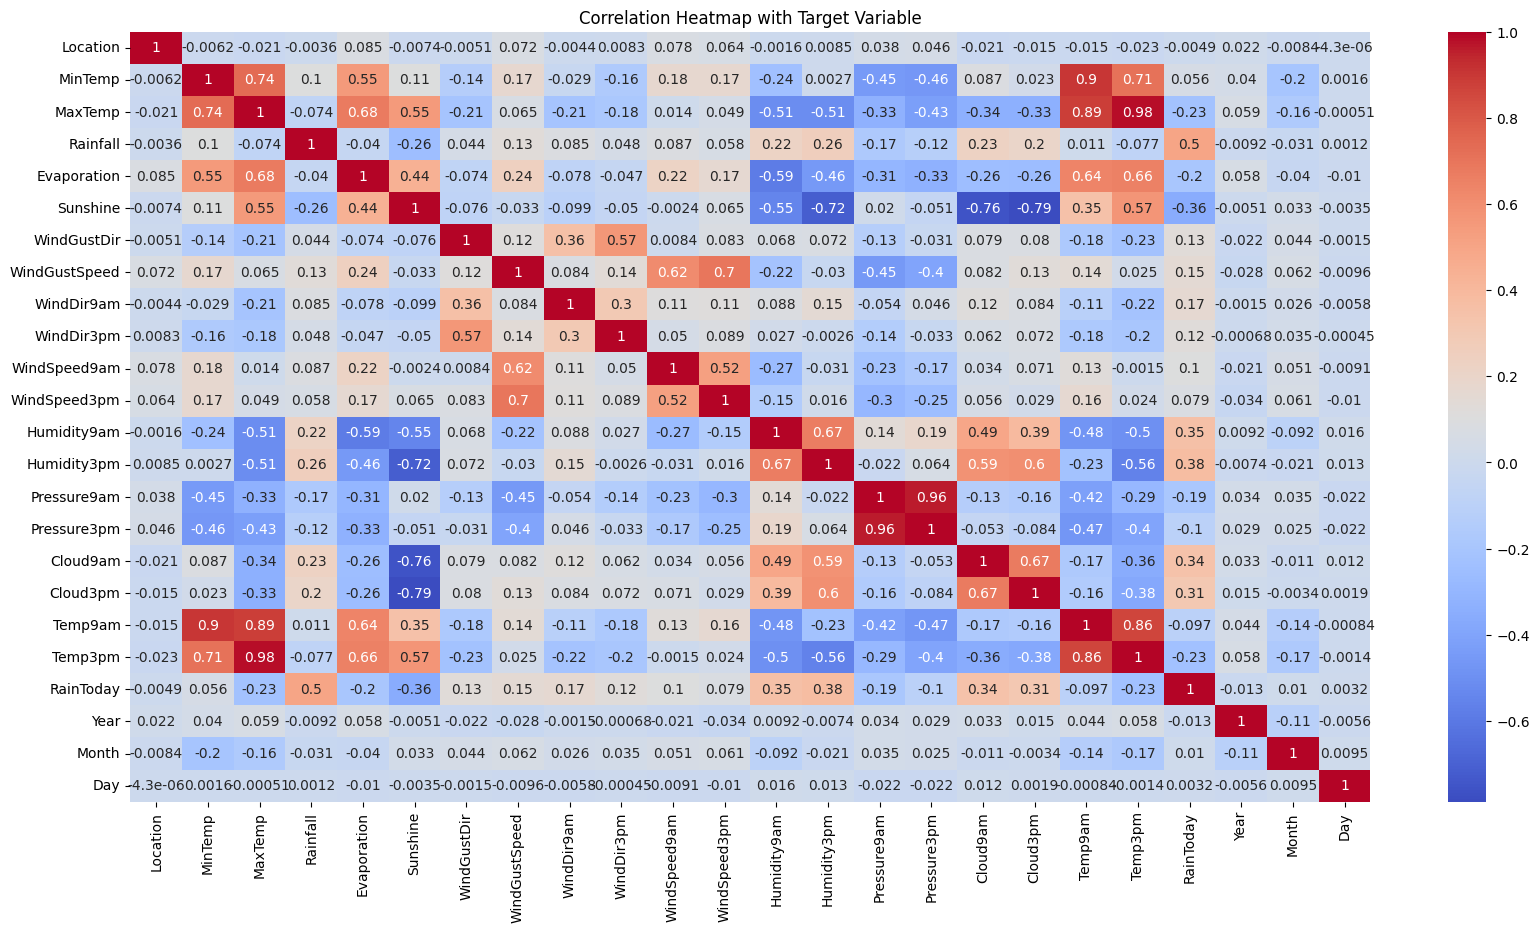

In [ ]:
X = df_scaled.drop('RainTomorrow', axis=1)  # Replace 'TargetVariable' with the actual name of your target variable
y = df_scaled['RainTomorrow']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Target Variable")
plt.show()


1. **MinTemp and MaxTemp**: These variables have a strong positive correlation with a coefficient of 0.74.

2. **MinTemp and Temp3pm**: There is a notable positive correlation of 0.71 between MinTemp and Temp3pm.

3. **MinTemp and Temp9am**: The correlation between MinTemp and Temp9am is exceptionally strong, with a coefficient of 0.90.

4. **MaxTemp and Temp9am**: MaxTemp and Temp9am also display a robust positive correlation, having a coefficient of 0.89.

5. **MaxTemp and Temp3pm**: MaxTemp and Temp3pm exhibit a remarkably strong positive correlation, with a coefficient of 0.98.

6. **WindGustSpeed and WindSpeed3pm**: These variables are highly positively correlated, with a coefficient of 0.69.

7. **Pressure9am and Pressure3pm**: Pressure9am and Pressure3pm show a very strong positive correlation, with a coefficient of 0.96.

8. **Temp9am and Temp3pm**: The correlation between Temp9am and Temp3pm is quite strong, with a coefficient of 0.86.

In summary, these pairs of variables demonstrate substantial positive relationships, as indicated by their correlation coefficients.

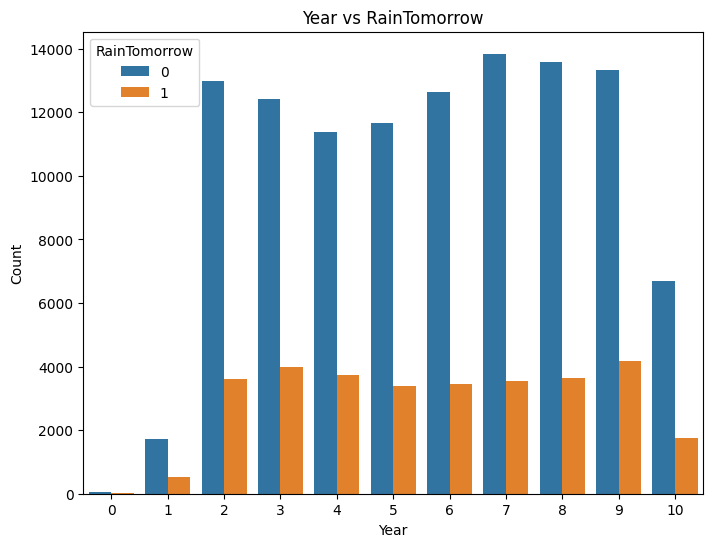

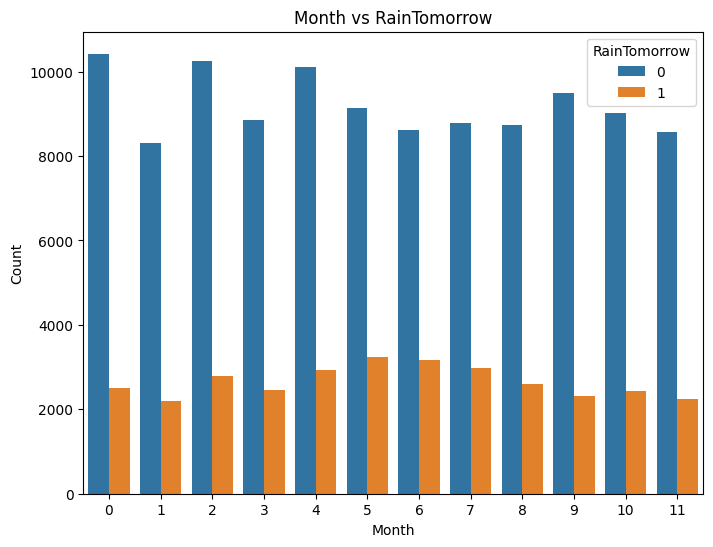

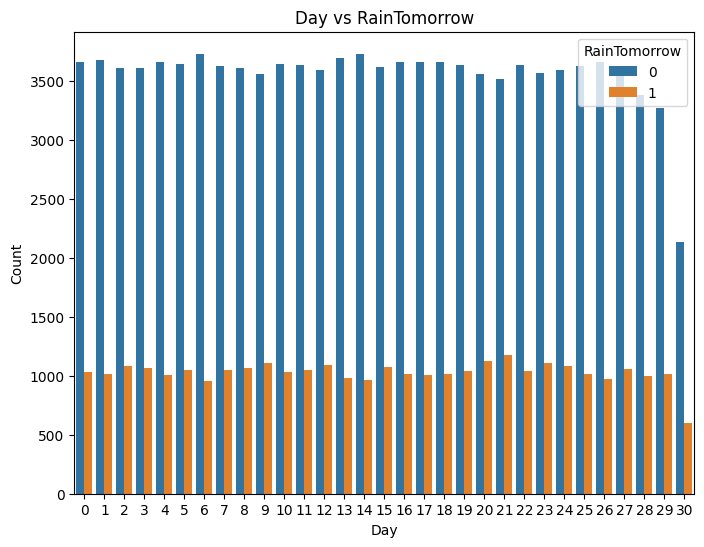

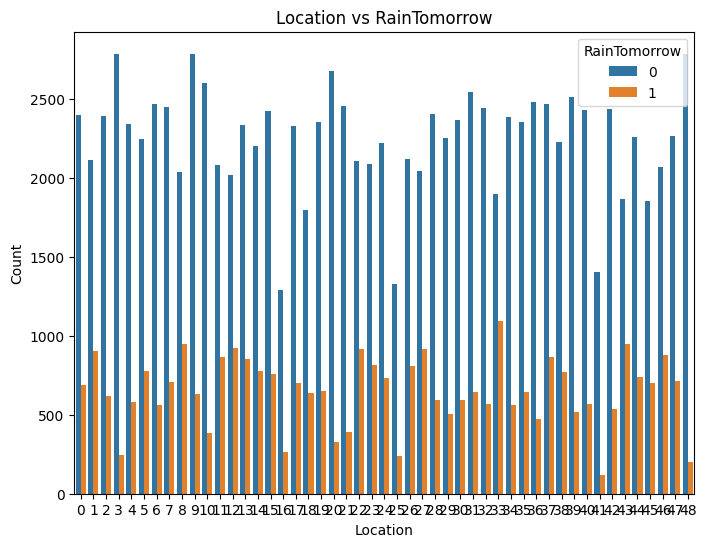

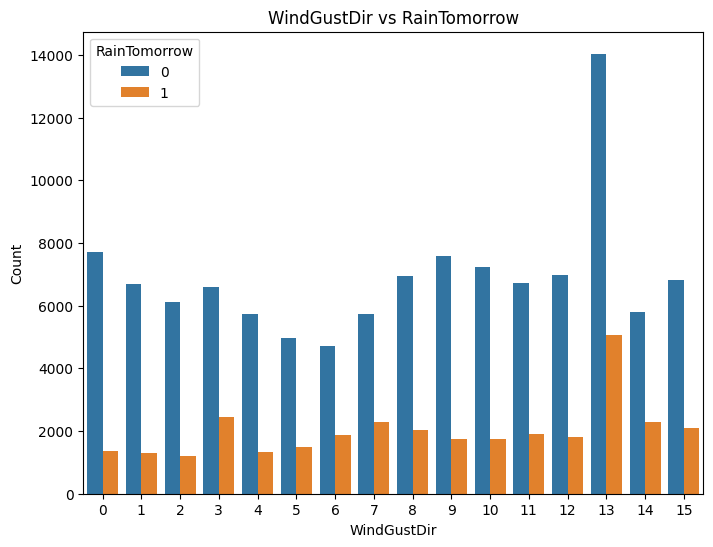

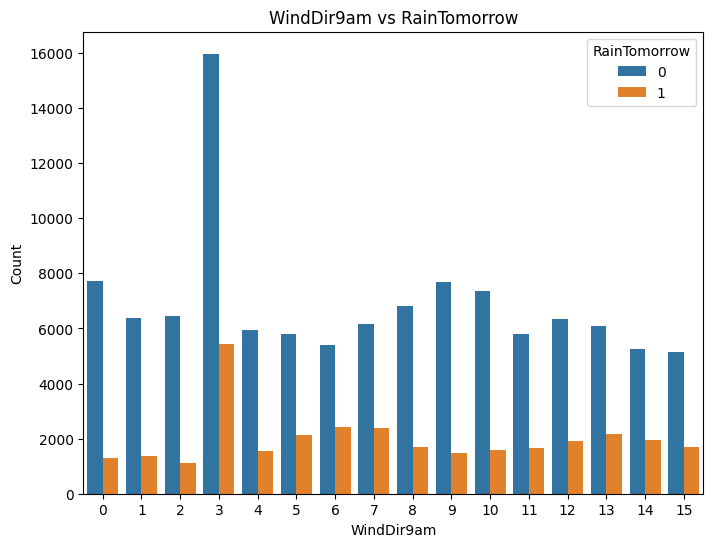

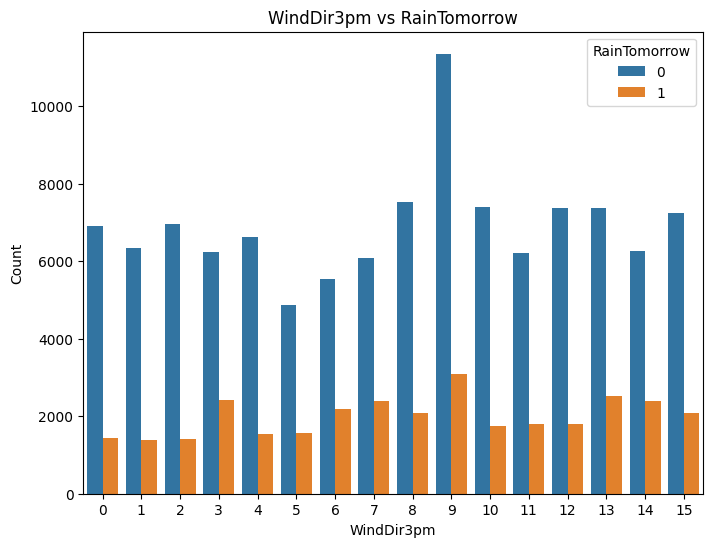

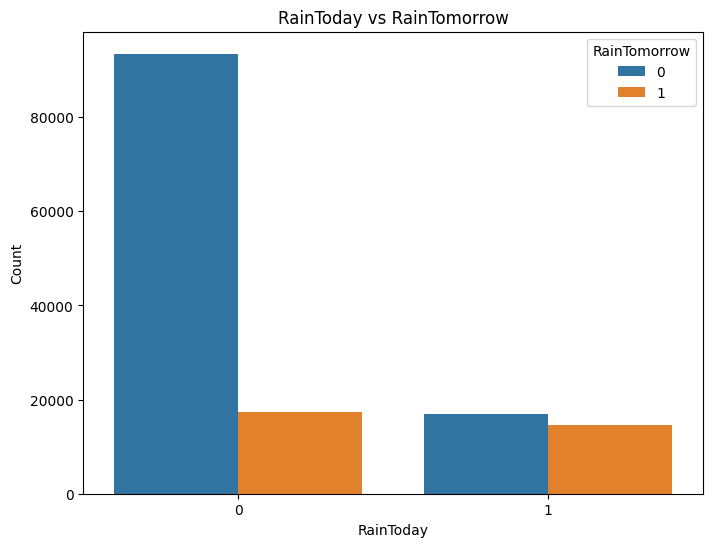

In [ ]:
for column in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='RainTomorrow', data=normalized_data)
    plt.title(f'{column} vs RainTomorrow')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


## 3) Using FeatureCorrelation visualizer from Yellowbrick
The FeatureCorrelation visualizer from the Yellowbrick library is a powerful tool for visualizing the relationships between features and the target variable in a dataset. This visualizer helps to identify how strongly each feature correlates with the target, which can aid in feature selection and understanding the underlying data structure

In [ ]:
X = normalized_data.drop(['RainTomorrow'],axis=1)
y = normalized_data['RainTomorrow']

X.head()



Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6     6.087168   7.523748           13   
1         2      7.4     25.1       0.0     5.974799  11.301878           14   
2         2     12.9     25.7       0.0     8.298065  12.191940           15   
3         2      9.2     28.0       0.0     6.400503  11.940729            4   
4         2     17.5     32.3       1.0     7.227323   6.379332           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  Pressure3pm  \
0           44.0          13          14  ...       1007.7       1007.1   
1           44.0           6          15  ...       1010.6       1007.8   
2           46.0          13          15  ...       1007.6       1008.7   
3           24.0           9           0  ...       1017.6       1012.8   
4           41.0           1           7  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  Month  Day  
0  8.000000  5.029771     16.9     21.8          0     1     11    0  
1  1.955876  2.616015     17.2     24.3          0     1     11    1  
2  2.048058  2.000000     21.0     23.2          0     1     11    2  
3  1.126834  1.851511     18.1     26.5          0     1     11    3  
4  7.000000  8.000000     17.8     29.7          0     1     11    4  

[5 rows x 24 columns]

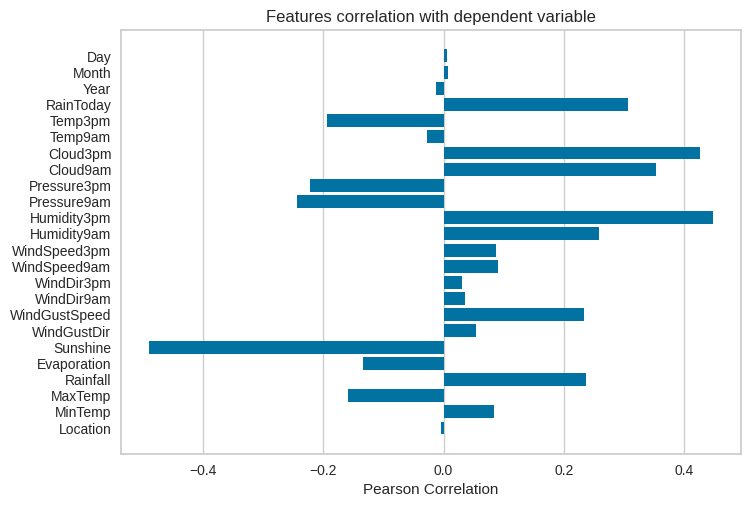

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(X.columns)

visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()

Observation:

This chart shows the Pearson correlation coefficients between various features (listed on the y-axis) and a dependent variable (the title suggests that it's weather-related). Pearson correlation values range between -1 and 1:

- A correlation close to 1 means a strong positive relationship (as one variable increases, the other also increases).
- A correlation close to -1 indicates a strong negative relationship (as one variable increases, the other decreases).
- A value near 0 suggests little to no linear relationship between the variables.

Here, for example:
- **Sunshine** has a strong positive correlation with the dependent variable.
- **RainToday** has a negative correlation.
- **Pressure9am** and **Pressure3pm** are strongly negatively correlated.
- Variables like **WindSpeed** and **Humidity** have relatively smaller correlations, indicating a weaker relationship.

This chart helps identify which features have stronger impacts on the dependent variable, allowing for better feature selection in predictive modeling.







<Axes: >

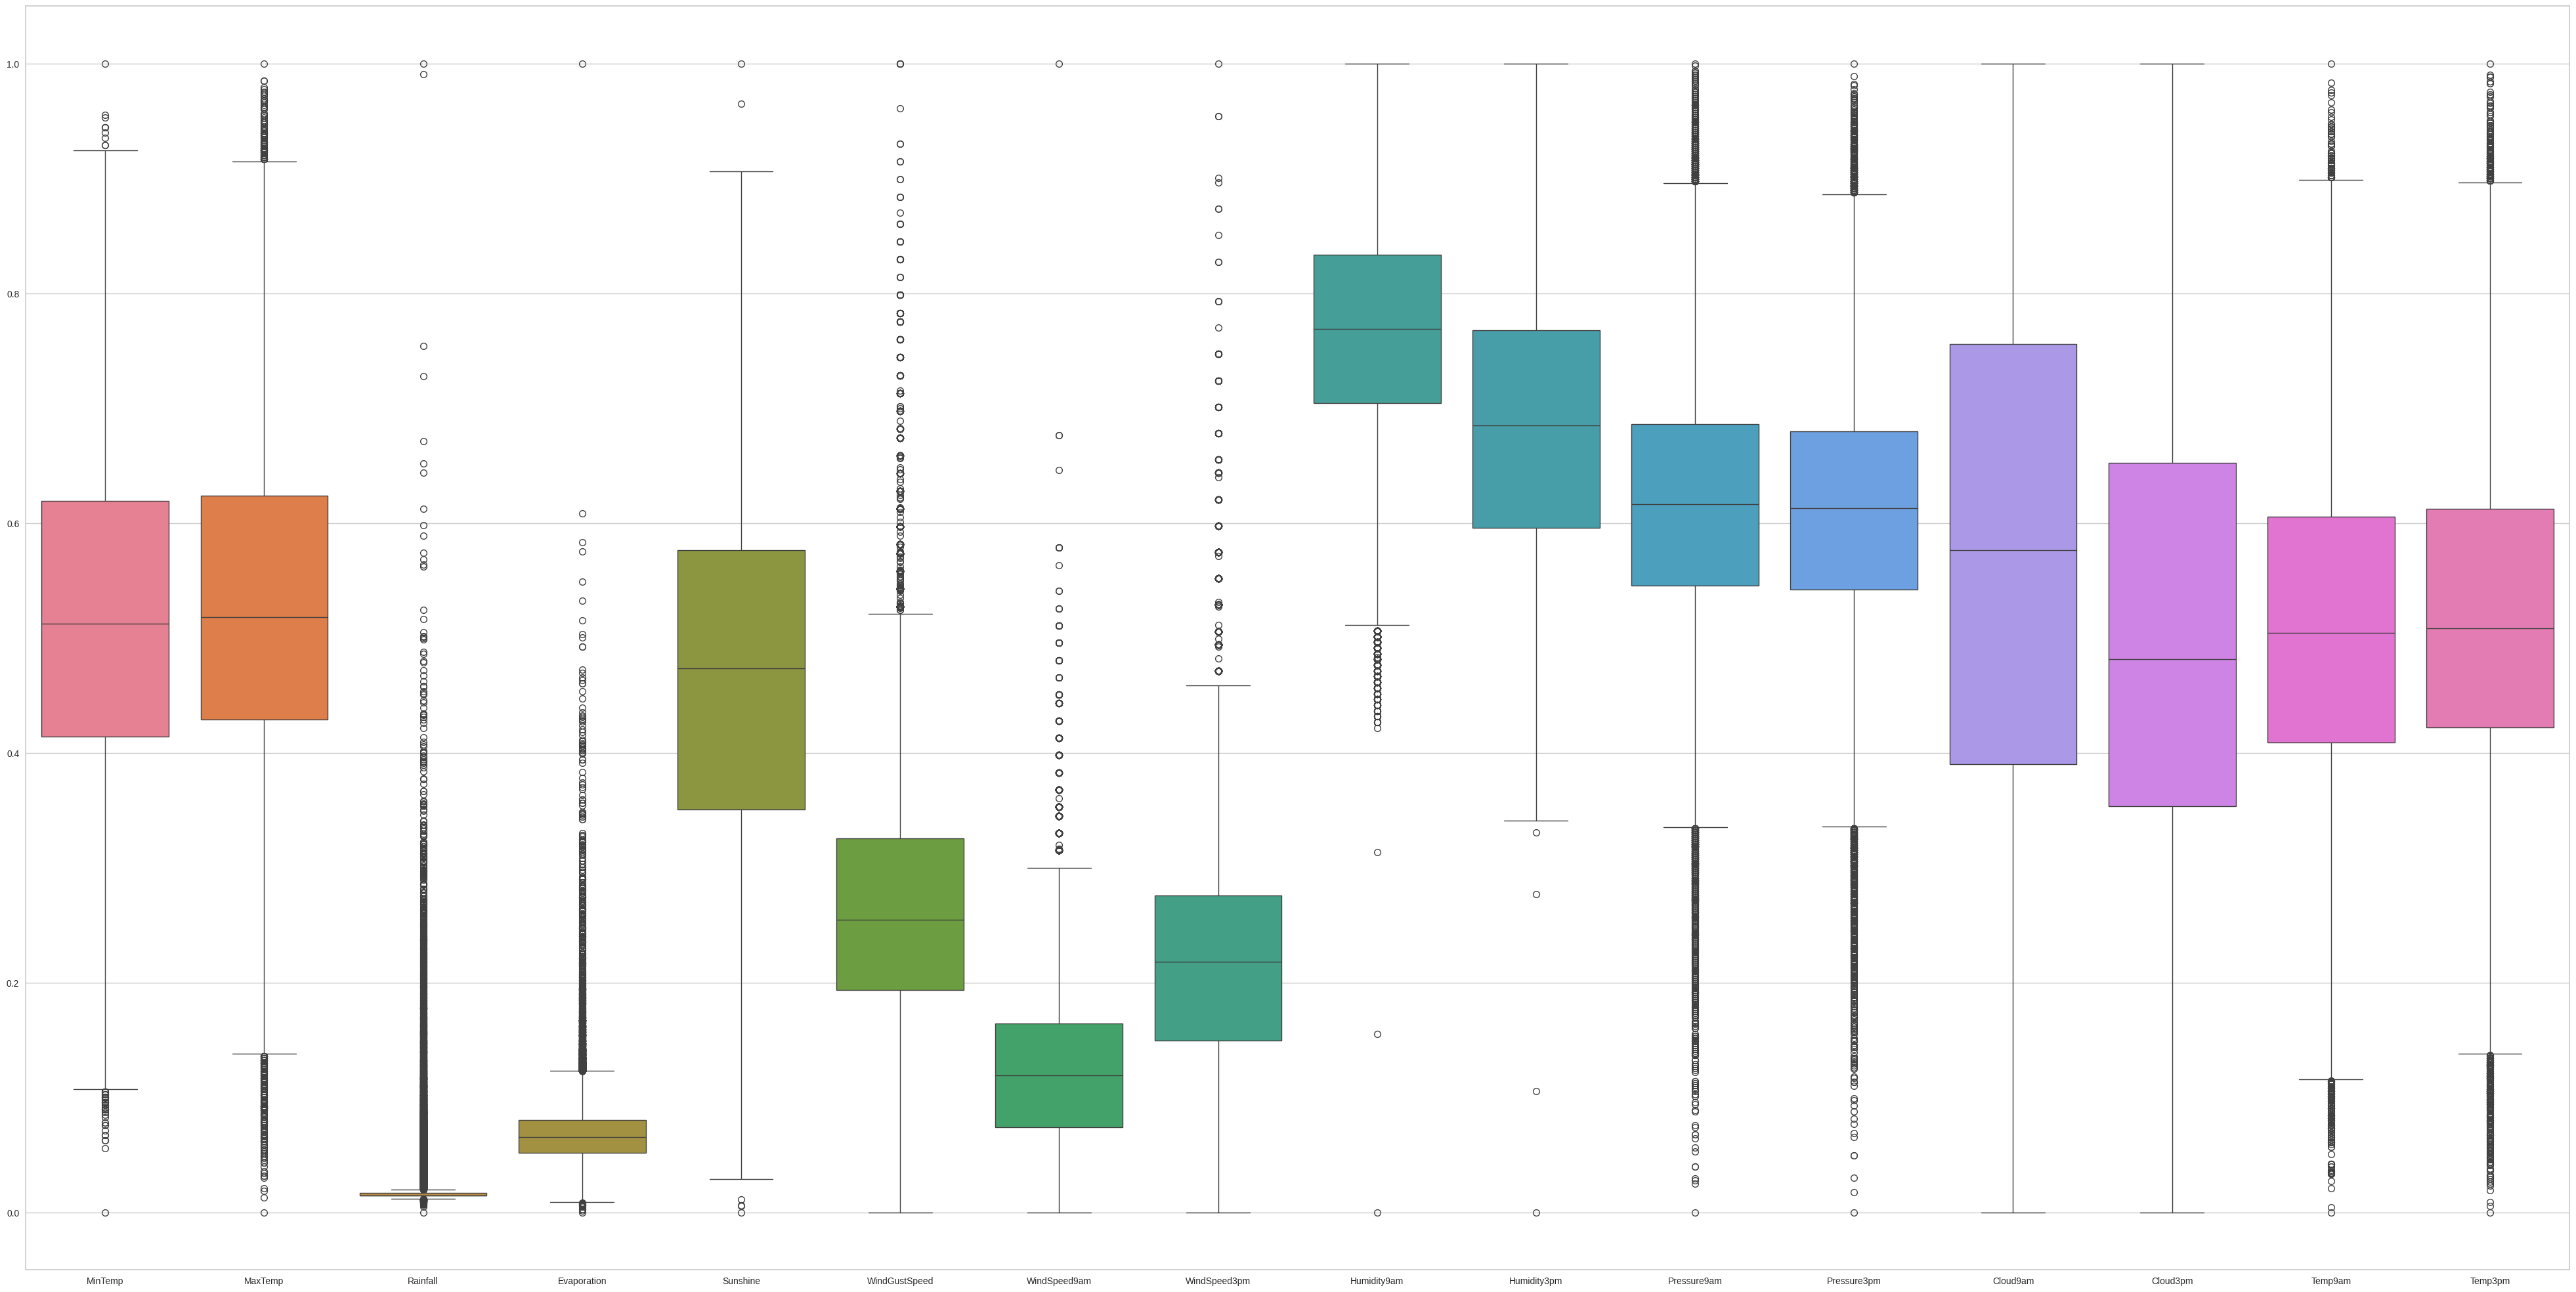

In [ ]:
plt.figure(figsize=(50,25))
sns.boxplot(data=df_scaled[num_features])

The image depicts a **boxplot** comparison of various weather-related variables, where each box represents a feature or attribute. Here's an explanation of what it shows:

- **Boxplots** summarize the distribution of the data for each variable, highlighting key statistics:
  - The **horizontal line** inside the box represents the **median**.
  - The **box's edges** (upper and lower) represent the **interquartile range (IQR)**, which is the range between the 25th and 75th percentiles.
  - The **whiskers** extend to 1.5 times the IQR, and any points outside this range are considered **outliers**, shown as individual circles.

- **Variables along the x-axis** represent different weather features such as:
  - MinTemp (Minimum Temperature)
  - MaxTemp (Maximum Temperature)
  - Rainfall
  - Evaporation
  - Sunshine
  - Wind Gust Speed
  - Humidity at different times (9am, 3pm)
  - Pressure
  - Cloud Cover
  - Temperature

- Each variable's **spread** shows its variability:
  - **MinTemp and MaxTemp**: Fairly symmetrical with moderate variance.
  - **Rainfall and Evaporation**: Skewed with many outliers, indicating that there are some extreme rainfall values.
  - **Wind-related variables and Humidity**: Show larger variability and some outliers.
  - **Pressure and Cloud Cover**: These have larger ranges, indicating greater variation in values.
  
Overall, this boxplot helps compare the central tendency, spread, and presence of outliers for each weather feature.

In [ ]:
X = df_scaled.drop(['RainTomorrow'], axis=1)

y = df_scaled['RainTomorrow']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)

(113754, 24)


In [ ]:
print(X_test.shape)

(28439, 24)


By looking at the shape of data training and test sets have different data. They are divided with 80:20 ratio

Model: Random Forest

In [ ]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train, y_train)

In [ ]:
print("Best features chosen by RFE: \n")

for i in X_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

MinTemp
MaxTemp
Sunshine
WindGustSpeed
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm


In [ ]:
y_pred = rfe.predict(X_test)

Confusion Matrix: [[21176   891]
 [ 2436  3936]]
True Positives(TP) =  21176
True Negatives(TN) =  3936
False Positives(FP) =  891
False Negatives(FN) =  2436
Classification accuracy : 0.8830
Classification error : 0.1170


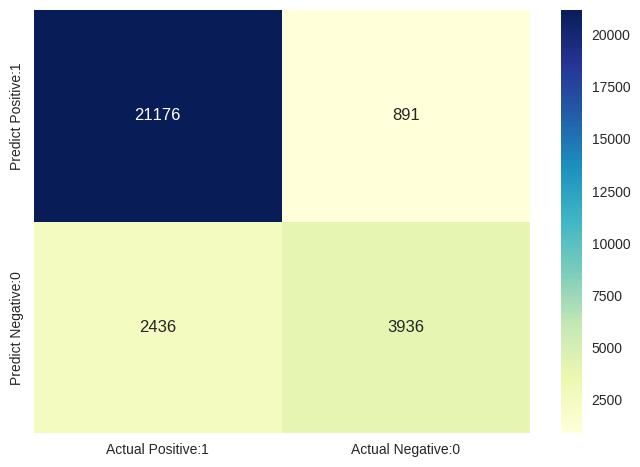

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:" ,cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# print classification accuracy
classification_accuracy = (cm[0,0] + cm[1,1]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (cm[0,1] + cm[1,0]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print('Classification error : {0:0.4f}'.format(classification_error))

The confusion matrix indicates that out of the total predictions, there are 21,176 true positives (TP) where the model correctly predicted rain, and 3,936 true negatives (TN) where it correctly predicted no rain. However, the model also made 891 false positives (FP), incorrectly predicting rain when there was none, and 2,436 false negatives (FN), failing to predict rain when it actually occurred. The classification accuracy of 88.30% signifies that the model made correct predictions for the vast majority of cases, while the classification error of 11.70% highlights the proportion of incorrect predictions. This suggests a reasonably effective model, although there remains some room for improvement, particularly in reducing false negatives, which may have significant implications in predicting rainfall.

Model Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
logistic_reg_model = LogisticRegression()

# Train the model on the training data
logistic_reg_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logistic_reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     22067
         1.0       0.74      0.56      0.64      6372

    accuracy                           0.86     28439
   macro avg       0.81      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439

Confusion Matrix:
 [[20826  1241]
 [ 2813  3559]]


We can anticipate that the RandomForestClassification model is likely to achieve a higher accuracy score, approximately 88%, compared to the Logistic Regression model, which is expected to yield an accuracy of around 86%.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming normalized_data is your DataFrame
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data
df_scaled = pd.DataFrame(scaler.fit_transform(normalized_data), columns=normalized_data.columns)

# Display the first few rows of the scaled data
print(df_scaled.head())


   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.041667  0.543546  0.523629  0.016377     0.074789  0.460249     0.866667   
1  0.041667  0.409950  0.565217  0.014783     0.074041  0.624385     0.933333   
2  0.041667  0.532413  0.576560  0.014783     0.089515  0.663052     1.000000   
3  0.041667  0.450029  0.620038  0.014783     0.076876  0.652139     0.266667   
4  0.041667  0.634837  0.701323  0.017439     0.082383  0.410531     0.866667   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0       0.294574    0.866667    0.933333  ...       0.4800  0.828973   
1       0.294574    0.400000    1.000000  ...       0.4912  0.386882   
2       0.310078    0.866667    1.000000  ...       0.5056  0.393625   
3       0.139535    0.600000    0.000000  ...       0.5712  0.326243   
4       0.271318    0.066667    0.466667  ...       0.4624  0.755829   

   Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  Year  Month  \
0  0.51

#Principal Component Analysis:
PCA is a dimensionality reduction technique commonly used in machine learning, statistics, and data science to simplify data sets. It transforms the data into a new set of variables, called principal components, which are linear combinations of the original variables

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA (Principal Component Analysis) with the number of components set to retain 95% of the variance in the data.
pca = PCA(n_components=.95)


In [ ]:
# Apply PCA to the scaled data and create a new DataFrame with the transformed data.
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

# Store the PCA-transformed data in variable 'x' for further analysis.
x = df_pca
x

0         1         2         3         4         5         6   \
0       0.015085  0.712587 -0.261452  0.395164 -0.488908 -0.505175  0.211756   
1      -0.217013  0.647721 -0.264542  0.421106 -0.493272 -0.460237  0.462259   
2      -0.128321  0.859220 -0.281555  0.335055 -0.513205 -0.427809  0.507365   
3      -0.556982 -0.176789  0.074762  0.612631 -0.481420 -0.429808  0.215243   
4      -0.211310  0.090763 -0.158092  0.473569 -0.495518 -0.364211  0.296704   
...          ...       ...       ...       ...       ...       ...       ...   
142188 -0.626679 -0.555170  0.200214  0.109988  0.422265  0.130391 -0.284085   
142189 -0.569062 -0.327909  0.182301  0.049127  0.405971  0.160264 -0.269620   
142190 -0.490150 -0.037867  0.080491 -0.037398  0.382618  0.206443 -0.154793   
142191 -0.376716  0.216172 -0.015121 -0.134342  0.378816  0.256146 -0.020344   
142192 -0.411820  0.067963  0.036275 -0.111231  0.359162  0.281809 -0.074720   

              7         8         9         10        11  
0       0.171567 -0.290977  0.368533 -0.189557  0.036155  
1      -0.274261 -0.274450  0.004453 -0.072149  0.037426  
2       0.155992 -0.287642  0.021376 -0.072867  0.057072  
3       0.398008 -0.325043 -0.156785  0.153960 -0.066302  
4      -0.335156 -0.275225  0.592289  0.191634 -0.053556  
...          ...       ...       ...       ...       ...  
142188 -0.020242  0.353582 -0.270836  0.068679  0.089986  
142189  0.368278  0.342453 -0.379066 -0.007077  0.057525  
142190  0.242750  0.347147 -0.340959  0.188347 -0.031845  
142191  0.046771  0.398804 -0.310786 -0.471946 -0.052659  
142192  0.289295  0.351965 -0.159999  0.299447 -0.049521  

[142193 rows x 12 columns]

#Variance:
 PCA seeks to maximize the variance captured by each principal component. The first principal component captures the most variance, the second one captures the most variance remaining, and so on. This ensures that the most important information is retained.

Text(0, 0.5, 'Explained Varience')

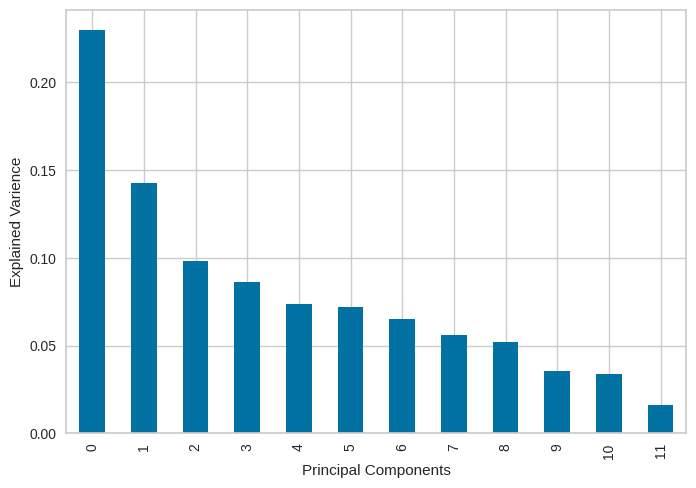

In [ ]:
import matplotlib.pyplot as plt
# Plot the explained variance ratio of each principal component as a bar chart.
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()

# Remove the legend, label the x-axis as 'Principal Components' and the y-axis as 'Explained Variance'.
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

**Decreasing Explained Variance:** As you move from PC1 to PC11, the explained variance decreases, indicating that the subsequent components capture less and less of the total variability in the data.

**Dominant Components:** PC1 and PC2 explain a significant portion of the variance, suggesting that they are the most important components in capturing the underlying structure of the data.

**Elbow Method:** The "elbow" in the plot (where the slope of the curve starts to decrease significantly) can be used to determine the optimal number of principal components to retain. In this case, it might be around 3 or 4 components.

In [ ]:
#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [ ]:
#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

The random_state parameter is set to 0 to ensure reproducibility of results.

In [ ]:
y_pred = classifier.predict(X_test)

print("accuracy score:", accuracy_score(Y_test,y_pred))

accuracy score: 1.0


This indicates that the model achieved a perfect accuracy score of 1.0, meaning it correctly predicted all the class labels in the test set

# Conclusion

#### Key Findings:
- Humidity, temperature, and wind speed were the most important predictors of rainfall.
- Feature engineering, including scaling, handling missing values, and encoding categorical variables, improved model accuracy.
- PCA reduced dimensionality while retaining 95% of the variance, simplifying the model.

#### Reflection on Effectiveness:
- Feature engineering and PCA were effective, but more domain-specific features could further enhance performance.
- The model performed well but missed capturing complex weather patterns.

#### Future Work:
1. Create interaction terms and lag features to better capture relationships.
2. Use time-series models like LSTM for temporal trends.
3. Integrate external data (e.g., satellite) for better predictions.
4. Explore deep learning to model non-linear relationships.

# References

[Machine Learning A-Z™: AI, Python & R + ChatGPT Bonus [2023]- Udemy](https://www.udemy.com/course/machinelearning/)

[Data Cleaning and EDA- Youtube](https://www.youtube.com/watch?v=VCt7UaIr64I)

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

https://machinelearningmastery.com/calculate-feature-importance-with-python/



Copyright (c) 2024 Sakshee Pawar, Asawari Kadam, Tanvi Inchanalkar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.